# Streaming TV Services

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("streaming_tv.csv")

In [3]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0
2,Money Heist,2017,18+,8.4,91%,1,0,0,0
3,Sherlock,2010,16+,9.1,78%,1,0,0,0
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0


### Number of Shows Rated for Each Service

In [4]:
df["Netflix"].sum()

1931

In [5]:
df["Hulu"].sum()

1754

In [6]:
df["Prime Video"].sum()

2144

In [7]:
df["Disney+"].sum()

180

### Total Number of Shows Rated

In [8]:
df.shape[0]

5611

### Determine the Proportion of Shows That Are Top-Rated

In [9]:
def stream_proportions(rater, threshold, streaming_service):
    top_rated_count = df.loc[(df[streaming_service]==1) & 
                             (df[rater] >= threshold), 
                             streaming_service].count()
    lower_rated_count = df.loc[(df[streaming_service]==1) & 
                               (df[rater] < threshold), 
                               streaming_service].count()
    return top_rated_count, lower_rated_count

# IMDb Ratings

In [10]:
streaming_services = ["Netflix", "Hulu", "Prime Video", "Disney+"]
rater = "IMDb"
threshold = 7

N = len(streaming_services)  # number of streaming services

num_top_shows = []
num_lower_shows = []

for service in streaming_services:
    proportions = stream_proportions(rater, threshold, service)
    num_top_shows.append(proportions[0])
    num_lower_shows.append(proportions[1])

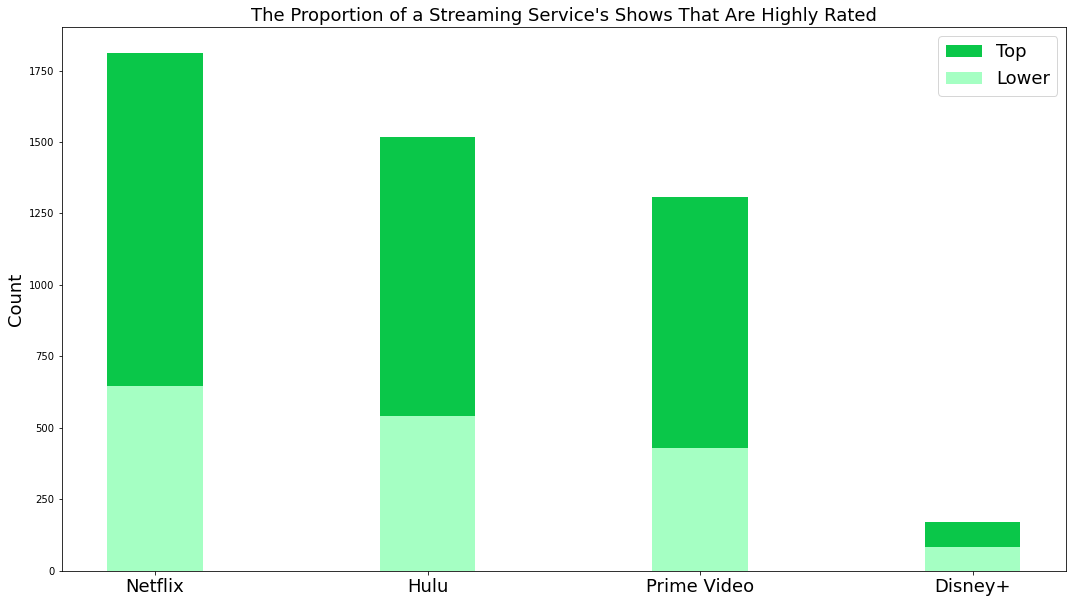

In [11]:
import numpy as np
import matplotlib.pyplot as plt
    
fig, ax = plt.subplots(figsize=(18, 10))

index = np.arange(N)    # the x locations for the services
width = 0.35       # the width of the bars

p1 = ax.bar(index, num_lower_shows, width, color='#A5FFC3', )
p2 = ax.bar(index, num_top_shows, width, color='#0AC749', bottom=num_lower_shows)
ax.set_ylabel('Count', fontsize=18)
ax.set_title("The Proportion of a Streaming Service's Shows That Are Highly Rated", fontsize=18)
plt.xticks(index, streaming_services, fontsize=18)
plt.legend((p2[0], p1[0]), ('Top', 'Lower'), fontsize=18)


### Percentage of IMDb Ratings Above 7

In [12]:
for i in range(len(num_top_shows)):
    percentage = num_top_shows[i]/(num_top_shows[i] + num_lower_shows[i]) * 100
    print(f"{streaming_services[i]:>12}: {int(percentage)}%")

     Netflix: 64%
        Hulu: 64%
 Prime Video: 67%
     Disney+: 50%


# Rotten Tomatoes Ratings

In [13]:
streaming_services = ["Netflix", "Hulu", "Prime Video", "Disney+"]
rater = "Rotten Tomatoes"
threshold = "70%"

N = len(streaming_services)  # number of streaming services

num_top_shows = []
num_lower_shows = []

for service in streaming_services:
    proportions = stream_proportions(rater, threshold, service)
    num_top_shows.append(proportions[0])
    num_lower_shows.append(proportions[1])

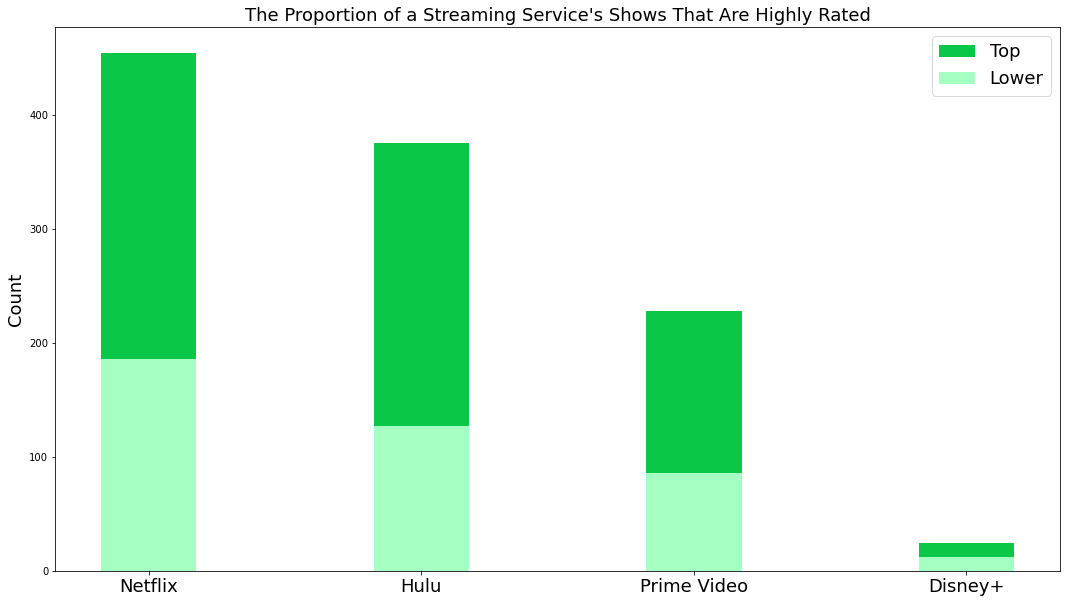

In [14]:
import numpy as np
import matplotlib.pyplot as plt
    
fig, ax = plt.subplots(figsize=(18, 10))

index = np.arange(N)    # the x locations for the services
width = 0.35       # the width of the bars

p1 = ax.bar(index, num_lower_shows, width, color='#A5FFC3', )
p2 = ax.bar(index, num_top_shows, width, color='#0AC749', bottom=num_lower_shows)
ax.set_ylabel('Count', fontsize=18)
ax.set_title("The Proportion of a Streaming Service's Shows That Are Highly Rated", fontsize=18)
plt.xticks(index, streaming_services, fontsize=18)
plt.legend((p2[0], p1[0]), ('Top', 'Lower'), fontsize=18)


### Percentage of Rotten Tomatoes Ratings Above "70%"

In [15]:
for i in range(len(num_top_shows)):
    percentage = num_top_shows[i]/(num_top_shows[i] + num_lower_shows[i]) * 100
    print(f"{streaming_services[i]:>12}: {int(percentage)}%")

     Netflix: 59%
        Hulu: 66%
 Prime Video: 62%
     Disney+: 50%
